In [1]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bank_marketing_part1_Data.csv")

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [5]:
df.shape

(210, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [7]:
df.describe(include = 
           'all')

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [8]:
df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [9]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [10]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


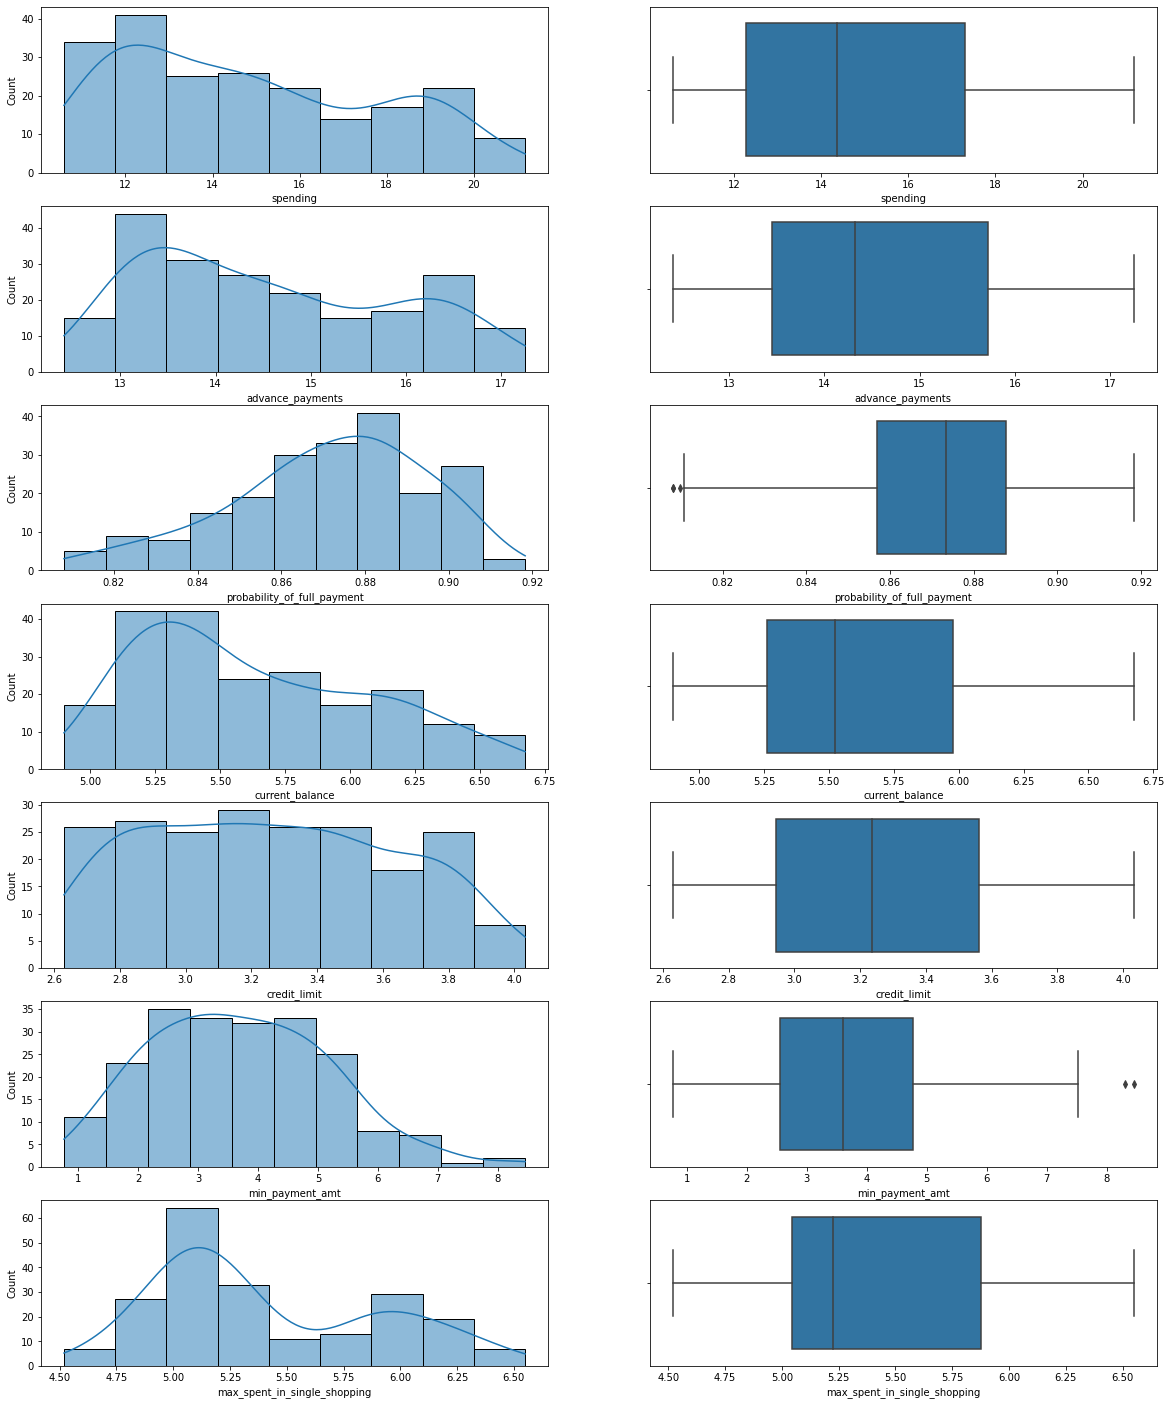

In [11]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(20, 25)

a = sns.histplot(data = df , x = 'spending', kde = True, ax=axes[0][0])


a = sns.boxplot(x = df['spending']  , ax=axes[0][1])


a = sns.histplot(df['advance_payments'], kde = True, ax=axes[1][0])


a = sns.boxplot(x = df['advance_payments']  , ax=axes[1][1])


a = sns.histplot(df['probability_of_full_payment'],  kde = True, ax=axes[2][0])


a = sns.boxplot(x = df['probability_of_full_payment']  , ax=axes[2][1])


a = sns.histplot(df['current_balance'],  kde = True, ax=axes[3][0])


a = sns.boxplot(x = df['current_balance']  , ax=axes[3][1])


a = sns.histplot(df['credit_limit'], kde = True, ax=axes[4][0])


a = sns.boxplot(x = df['credit_limit']  , ax=axes[4][1])


a = sns.histplot(df['min_payment_amt'], kde = True, ax=axes[5][0])


a = sns.boxplot(x = df['min_payment_amt']  , ax=axes[5][1])


a = sns.histplot(df['max_spent_in_single_shopping'], kde = True, ax=axes[6][0])

a = sns.boxplot(x = df['max_spent_in_single_shopping']  , ax=axes[6][1])

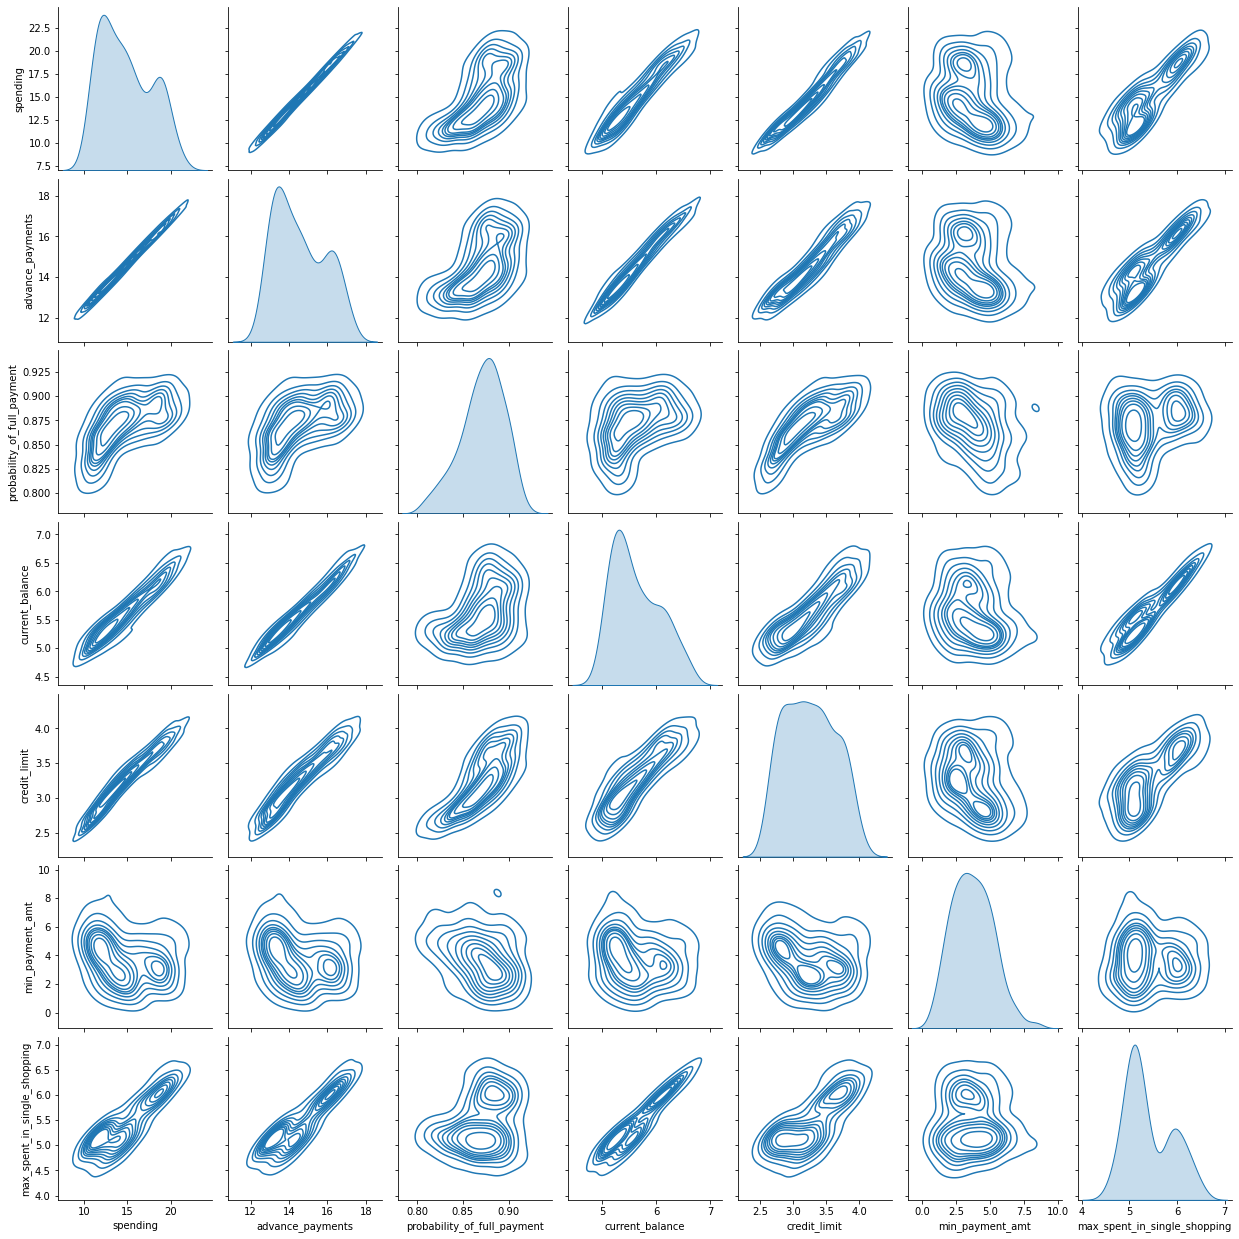

In [12]:
sns.pairplot(df , kind = 'kde')

<AxesSubplot:>

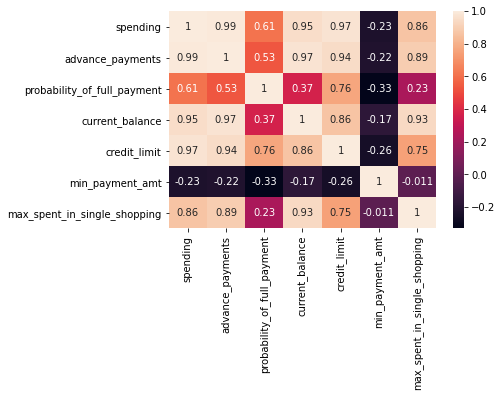

In [13]:
sns.heatmap(df.corr() , annot =True)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
X = StandardScaler()

In [16]:
scaled_df = pd.DataFrame(X.fit_transform(df), columns=df.columns)

In [17]:
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [19]:
link_method_ward = linkage(scaled_df, method = 'ward')

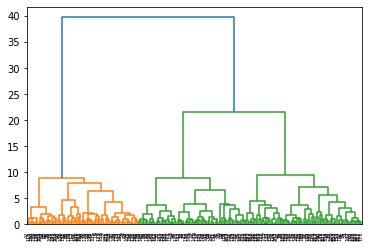

In [20]:
dend = dendrogram(link_method_ward)

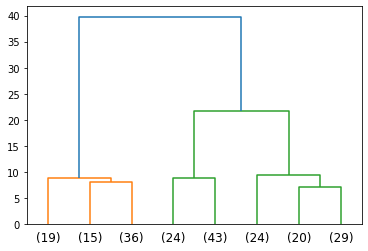

In [21]:
dend = dendrogram(link_method_ward , truncate_mode = 'lastp'  , p = 8)

In [22]:
from scipy.cluster.hierarchy import fcluster

In [23]:
clusters_ward = fcluster(link_method_ward , 3, criterion = 'maxclust')
clusters_ward

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [24]:
df['clusters_ward'] = clusters_ward

In [25]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_ward
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [26]:
df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_ward
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,3
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,1
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,3
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,1
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879,3


In [27]:
df.clusters_ward.value_counts().sort_index()

1    70
2    67
3    73
Name: clusters_ward, dtype: int64

In [28]:
aggdata= df.groupby('clusters_ward').mean()
aggdata['Freq']= df.clusters_ward.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters_ward,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


# K means

In [41]:
k_means = KMeans(n_clusters = 3 , random_state = 1)

In [42]:
k_means.fit(scaled_df)

KMeans(n_clusters=3, random_state=1)

In [43]:
k_means.labels_

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2])

In [44]:
k_means.inertia_

430.65897315130064

In [45]:
for i in range(1,30,1):
    k_means = KMeans(n_clusters = i, random_state = 1)
    k_means.fit(scaled_df)
    print("For {} number of cluster - {}".format(i,k_means.inertia_))

For 1 number of cluster - 1469.9999999999995
For 2 number of cluster - 659.1717544870411
For 3 number of cluster - 430.65897315130064
For 4 number of cluster - 371.301721277542
For 5 number of cluster - 327.9608240079031
For 6 number of cluster - 290.5900305968219
For 7 number of cluster - 264.83153087478144
For 8 number of cluster - 240.6837259501598
For 9 number of cluster - 220.85285825594738
For 10 number of cluster - 206.3829103601579
For 11 number of cluster - 189.63846645656452
For 12 number of cluster - 183.7346487390484
For 13 number of cluster - 172.1598950620133
For 14 number of cluster - 167.07845249676527
For 15 number of cluster - 158.07648199029748
For 16 number of cluster - 149.8595909007651
For 17 number of cluster - 142.92371683932512
For 18 number of cluster - 137.7206943340959
For 19 number of cluster - 133.49605677155398
For 20 number of cluster - 127.49168186267876
For 21 number of cluster - 122.72259401832262
For 22 number of cluster - 119.03230566151
For 23 numb

### wss reduces as k keeps increasing

In [46]:
wss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,random_state=1)
    k_means.fit(scaled_df)
    wss.append(k_means.inertia_)

In [47]:
a=[1,2,3,4,5,6,7,8,9,10]

c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

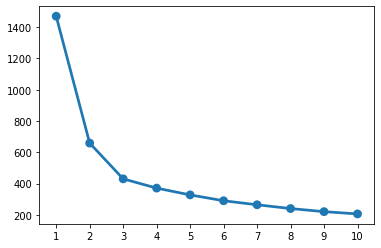

In [48]:
sns.pointplot(a, wss)

In [50]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [51]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [52]:
silhouette_score(scaled_df,labels,random_state=1)

0.40072705527512986

In [53]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [54]:
silhouette_score(scaled_df,labels,random_state=1)

0.32757426605518075

In [55]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [56]:
df["cluster_kmeans"] = labels
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_ward,clusters_average,cluster_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,3,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,1


In [58]:
df.cluster_kmeans.value_counts().sort_index()

0    72
1    67
2    71
Name: cluster_kmeans, dtype: int64

In [59]:
clust_profile = df.drop(['clusters_ward' , 'clusters_average'],axis=1)
clust_profile = clust_profile.groupby('cluster_kmeans').mean()
clust_profile['freq'] = df.cluster_kmeans.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
cluster_kmeans,,,,,,,,
0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,72
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71
